<a href="https://colab.research.google.com/github/Gabriel-Barroso-Ventura/YOLO-detection-project/blob/main/Yolo_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using YOLO to Image Detection**

On this project we download and import the weights of YOLO darknet network and retrain it with COCO database.



In [52]:
%cd /content
!rm -r darknet

/content


In [53]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [54]:
!rm -r ./darknet

!git clone https://github.com/pjreddie/darknet
%cd darknet
!make

!wget https://pjreddie.com/media/files/yolov3.weights


rm: cannot remove './darknet': No such file or directory
Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955 (from 1)
Receiving objects: 100% (5955/5955), 6.37 MiB | 19.66 MiB/s, done.
Resolving deltas: 100% (3932/3932), done.
/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

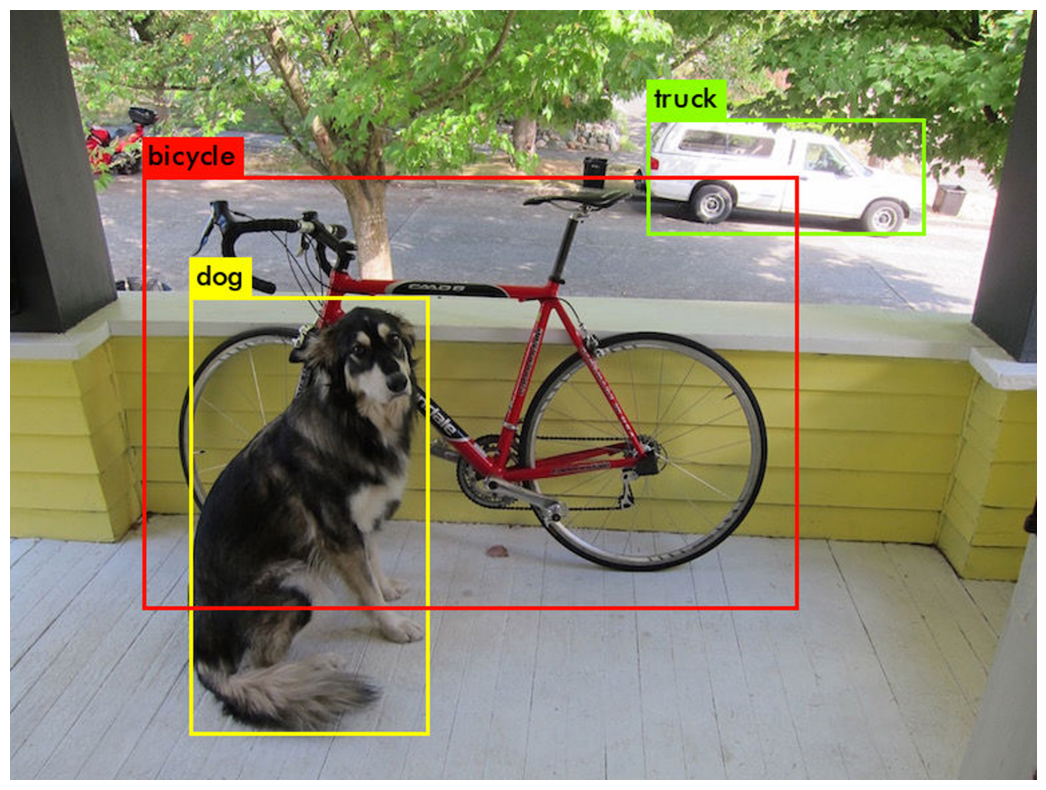

In [55]:
# Detect
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

# Show image
imShow('predictions.jpg')


## **Training with COCO data**

Now, let's train the network with more classes obtained from the COCO database



In [56]:
!ls
%cd ./scripts
%mkdir data
%cd data

# Clone COCO API
!git clone https://github.com/pdollar/coco
%cd coco

!mkdir images
%cd images

# Download Images
# !wget -c https://pjreddie.com/media/files/train2014.zip
!wget -c https://pjreddie.com/media/files/val2014.zip

# Unzip
# !unzip -q train2014.zip
!unzip -q val2014.zip

%cd ..

# Download COCO Metadata
!wget -c https://pjreddie.com/media/files/instances_train-val2014.zip
!wget -c https://pjreddie.com/media/files/coco/5k.part
!wget -c https://pjreddie.com/media/files/coco/trainvalno5k.part
!wget -c https://pjreddie.com/media/files/coco/labels.tgz
!tar xzf labels.tgz
!unzip -q instances_train-val2014.zip

# Set Up Image Lists
!paste <(awk "{print \"$PWD\"}" <5k.part) 5k.part | tr -d '\t' > 5k.txt
!paste <(awk "{print \"$PWD\"}" <trainvalno5k.part) trainvalno5k.part | tr -d '\t' > trainvalno5k.txt


backup	 examples	LICENSE       LICENSE.meta  obj		     results
cfg	 include	LICENSE.fuck  LICENSE.mit   predictions.jpg  scripts
darknet  libdarknet.a	LICENSE.gen   LICENSE.v1    python	     src
data	 libdarknet.so	LICENSE.gpl   Makefile	    README.md	     yolov3.weights
/content/darknet/scripts
/content/darknet/scripts/data
Cloning into 'coco'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975 (from 1)
Receiving objects: 100% (975/975), 11.72 MiB | 26.56 MiB/s, done.
Resolving deltas: 100% (576/576), done.
/content/darknet/scripts/data/coco
/content/darknet/scripts/data/coco/images
--2025-01-20 02:08:01--  https://pjreddie.com/media/files/val2014.zip
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 503 Service Unavailable
2025-01-20 02:08:03 ERROR 503: Service Unavailable.

unzip:  cannot find or open val2014.zi



Now go to your Darknet directory. We have to change the cfg/coco.data config file to point to your data:

    1 classes= 80
    2 train  = <path-to-coco>/trainvalno5k.txt
    3 valid  = <path-to-coco>/5k.txt
    4 names = data/coco.names
    5 backup = backup

You should replace <path-to-coco> with the directory where you put the COCO data.



In [59]:
%cd /content/darknet
!./darknet detector train cfg/coco.data cfg/yolov3.cfg darknet53.conv.74

/content/darknet
yolov3
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    